In [1]:
import pandas as pd
from tqdm import tqdm

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [ ]:
# 음수 표현
plt.rcParams['axes.unicode_minus'] = False

# 파일 확인

In [5]:
# d_l_match_yn :  속성 D 대분류 매칭 여부
# d_m_match_yn :  속성 D 중분류 매칭 여부
# d_s_match_yn :  속성 D 소분류 매칭 여부
# h_l_match_yn :  속성 H 대분류 매칭 여부
# h_m_match_yn :  속성 H 중분류 매칭 여부
# h_s_match_yn :  속성 H 소분류 매칭 여부

# person_attribute_a :  회원 속성 A
# person_attribute_a_1 :  회원 속성 A 하위 속성 1
# person_attribute_b :  회원 속성 B

# person_prefer_c :  회원 선호 속성 C
# person_prefer_d_1 :  회원 선호 속성 D 1번
# person_prefer_d_2 :  회원 선호 속성 D 2번
# person_prefer_d_3 :  회원 선호 속성 D 3번
# person_prefer_e :  회원 선호 속성 E
# person_prefer_f :  회원 선호 속성 F
# person_prefer_g :  회원 선호 속성 G
# person_prefer_h_1 :  회원 선호 속성 H 1번
# person_prefer_h_2 :  회원 선호 속성 H 2번
# person_prefer_h_3 :  회원 선호 속성 H 3번

# contents_attribute_i :  컨텐츠 속성 I
# contents_attribute_a :  컨텐츠 속성 A
# contents_attribute_j_1 :  컨텐츠 속성 J 하위 속성 1
# contents_attribute_j :  컨텐츠 속성 J
# contents_attribute_c :  컨텐츠 속성 C
# contents_attribute_k :  컨텐츠 속성 K
# contents_attribute_l :  컨텐츠 속성 L
# contents_attribute_d :  컨텐츠 속성 D
# contents_attribute_m :  컨텐츠 속성 M
# contents_attribute_e :  컨텐츠 속성 E
# contents_attribute_h :  컨텐츠 속성 H

# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시
# target :  컨텐츠 사용 여부 (라벨)

In [6]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 매칭 6개 특성 별 데이터 확인

In [7]:
import itertools

In [8]:
# 단계(6단계)별로 [0, 1]의 선택지 있는 모든 경우의 수 출력
match_cases = list(itertools.product(*[[0,1] for i in range(6)]))
match_cases

[(0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 1, 1),
 (0, 0, 0, 1, 0, 0),
 (0, 0, 0, 1, 0, 1),
 (0, 0, 0, 1, 1, 0),
 (0, 0, 0, 1, 1, 1),
 (0, 0, 1, 0, 0, 0),
 (0, 0, 1, 0, 0, 1),
 (0, 0, 1, 0, 1, 0),
 (0, 0, 1, 0, 1, 1),
 (0, 0, 1, 1, 0, 0),
 (0, 0, 1, 1, 0, 1),
 (0, 0, 1, 1, 1, 0),
 (0, 0, 1, 1, 1, 1),
 (0, 1, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 1),
 (0, 1, 0, 0, 1, 0),
 (0, 1, 0, 0, 1, 1),
 (0, 1, 0, 1, 0, 0),
 (0, 1, 0, 1, 0, 1),
 (0, 1, 0, 1, 1, 0),
 (0, 1, 0, 1, 1, 1),
 (0, 1, 1, 0, 0, 0),
 (0, 1, 1, 0, 0, 1),
 (0, 1, 1, 0, 1, 0),
 (0, 1, 1, 0, 1, 1),
 (0, 1, 1, 1, 0, 0),
 (0, 1, 1, 1, 0, 1),
 (0, 1, 1, 1, 1, 0),
 (0, 1, 1, 1, 1, 1),
 (1, 0, 0, 0, 0, 0),
 (1, 0, 0, 0, 0, 1),
 (1, 0, 0, 0, 1, 0),
 (1, 0, 0, 0, 1, 1),
 (1, 0, 0, 1, 0, 0),
 (1, 0, 0, 1, 0, 1),
 (1, 0, 0, 1, 1, 0),
 (1, 0, 0, 1, 1, 1),
 (1, 0, 1, 0, 0, 0),
 (1, 0, 1, 0, 0, 1),
 (1, 0, 1, 0, 1, 0),
 (1, 0, 1, 0, 1, 1),
 (1, 0, 1, 1, 0, 0),
 (1, 0, 1, 1, 0, 1),
 (1, 0, 1, 1, 1, 0),
 (1, 0, 1, 1,

# 유효한 경우의 수

## train

In [30]:
# 0 (0, 0, 0, 0, 0, 0) (36913, 35)
# 4 (0, 0, 0, 1, 0, 0) (78861, 35)
# 6 (0, 0, 0, 1, 1, 0) (17818, 35)
# 7 (0, 0, 0, 1, 1, 1) (53091, 35)
# 32 (1, 0, 0, 0, 0, 0) (32635, 35)
# 36 (1, 0, 0, 1, 0, 0) (78338, 35)
# 38 (1, 0, 0, 1, 1, 0) (17818, 35)
# 39 (1, 0, 0, 1, 1, 1) (52850, 35)
# 48 (1, 1, 0, 0, 0, 0) (12804, 35)
# 52 (1, 1, 0, 1, 0, 0) (25894, 35)
# 54 (1, 1, 0, 1, 1, 0) (5162, 35)
# 55 (1, 1, 0, 1, 1, 1) (14510, 35)
# 56 (1, 1, 1, 0, 0, 0) (20261, 35)
# 60 (1, 1, 1, 1, 0, 0) (33112, 35)
# 62 (1, 1, 1, 1, 1, 0) (5706, 35)
# 63 (1, 1, 1, 1, 1, 1) (16178, 35)

## test

In [31]:
# 0 (0, 0, 0, 0, 0, 0) (3343, 34)
# 4 (0, 0, 0, 1, 0, 0) (7196, 34)
# 6 (0, 0, 0, 1, 1, 0) (1843, 34)
# 7 (0, 0, 0, 1, 1, 1) (5224, 34)
# 32 (1, 0, 0, 0, 0, 0) (2821, 34)
# 36 (1, 0, 0, 1, 0, 0) (7051, 34)
# 38 (1, 0, 0, 1, 1, 0) (1600, 34)
# 39 (1, 0, 0, 1, 1, 1) (4826, 34)
# 48 (1, 1, 0, 0, 0, 0) (1137, 34)
# 52 (1, 1, 0, 1, 0, 0) (2474, 34)
# 54 (1, 1, 0, 1, 1, 0) (455, 34)
# 55 (1, 1, 0, 1, 1, 1) (1358, 34)
# 56 (1, 1, 1, 0, 0, 0) (1788, 34)
# 60 (1, 1, 1, 1, 0, 0) (3147, 34)
# 62 (1, 1, 1, 1, 1, 0) (575, 34)
# 63 (1, 1, 1, 1, 1, 1) (1566, 34)

# 매칭 별 시각화

In [75]:
# 단계(6단계)별로 [0, 1]의 선택지 있는 모든 경우의 수 출력
match_cases = list(itertools.product(*[[0,1] for i in range(6)]))

In [76]:
train_df = pd.DataFrame()
num_list = [0, 4, 6, 7, 32, 36, 38, 39, 48, 52, 54, 55, 56, 60, 62, 63]

for num in tqdm(num_list):
  c0, c1, c2, c3, c4, c5 = match_cases[num]
  tmp = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)&(train['h_m_match_yn']==c4)&(train['h_s_match_yn']==c5)]
  tmp_target = tmp['target'].value_counts(normalize=True)
  tmp_df = pd.DataFrame(tmp_target)
  train_df = pd.concat([train_df, tmp_df], axis=1)

train_df.columns = ['train_df1', 'train_df2', 'train_df3', 'train_df4',
        'train_df5', 'train_df6', 'train_df7', 'train_df8',
        'train_df9', 'train_df10', 'train_df11', 'train_df12',
        'train_df13', 'train_df14', 'train_df15', 'train_df16']
train_df

100%|██████████| 16/16 [00:00<00:00, 39.71it/s]


,train_df1,train_df2,train_df3,train_df4,train_df5,train_df6,train_df7,train_df8,train_df9,train_df10,train_df11,train_df12,train_df13,train_df14,train_df15,train_df16
0,0.582342,0.585866,0.610338,0.605055,0.508779,0.477457,0.473622,0.458846,0.457045,0.405847,0.39229,0.380979,0.459158,0.381674,0.370662,0.35505
1,0.417658,0.414134,0.389662,0.394945,0.491221,0.522543,0.526378,0.541154,0.542955,0.594153,0.60771,0.619021,0.540842,0.618326,0.629338,0.64495


## 시각화

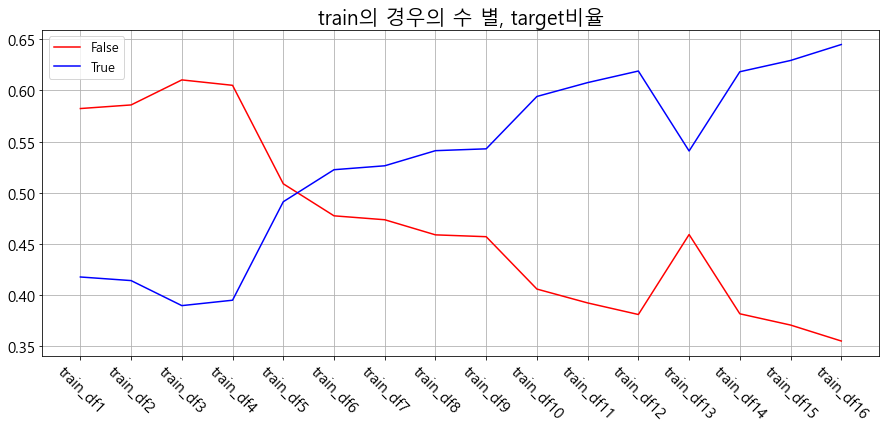

In [78]:
plt.figure(figsize=(15,6))
plt.title('train의 경우의 수 별, target비율', fontdict={'size':20})
plt.xticks(fontsize=15, rotation=-45)
plt.yticks(fontsize=15)
plt.grid(True)
plt.plot(target_df.iloc[0,:], label='False', color='red')
plt.plot(target_df.iloc[1,:], label='True', color='blue')
plt.legend(fontsize=13)

# 25개 특성에서 d,h large 매칭 별로 시각화 

In [64]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [65]:
test_col = ['d_l_match_yn', 'h_l_match_yn',
 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
  'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
   'person_prefer_e',
    'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 
     'contents_attribute_i', 'contents_attribute_a',
      'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
       'contents_attribute_l', 'contents_attribute_d',
        'contents_attribute_m', 'contents_attribute_e',
         'contents_attribute_h']
target = ['target']
train_col = test_col + target
len(train_col), len(test_col)

(24, 23)

In [66]:
train25 = train[train_col]
test25 = test[test_col]

In [67]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train25 = train25.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train25.head()

,d_l_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,...,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target
0,True,False,1,4,3,5,275,370,369,8,...,3,2,10,1,1608,275,1,4,139,1
1,False,True,1,3,4,1,114,181,175,4,...,3,1,5,1,1608,275,1,4,133,0
2,False,True,2,0,3,5,464,175,452,3,...,1,2,10,1,1600,94,1,4,53,0
3,False,True,2,0,2,5,703,705,704,3,...,3,1,5,1,1608,275,5,3,74,0
4,True,False,1,3,4,5,275,370,369,4,...,1,2,10,1,1608,275,1,4,74,0


In [68]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test25 = test25.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test25.head()

,d_l_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,...,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h
0,True,True,1,1,2,1,857,851,1227,4,...,1,3,2,10,1,1147,839,1,5,263
1,False,True,2,0,2,2,683,1086,662,2,...,1,3,1,5,1,1611,278,1,4,263
2,True,True,2,3,2,1,514,790,1233,0,...,3,3,1,3,1,1817,490,3,4,177
3,True,True,1,2,2,5,114,181,175,4,...,3,3,1,5,1,101,150,5,3,177
4,True,True,1,6,4,5,1082,1078,1056,5,...,3,1,1,5,1,985,1097,1,4,177


In [69]:
# 단계(4단계)별로 [0, 1]의 선택지 있는 모든 경우의 수 출력
match_cases = list(itertools.product(*[[0,1] for i in range(2)]))
match_cases

[(0, 0), (0, 1), (1, 0), (1, 1)]

## train

In [71]:
for num in range(4):
    c0, c1 = match_cases[num]
    tmp = train[(train['d_l_match_yn']==c0)&(train['h_l_match_yn']==c1)]
    print(num, match_cases[num], tmp.shape)

0 (0, 0) (36913, 35)
1 (0, 1) (149770, 35)
2 (1, 0) (65700, 35)
3 (1, 1) (249568, 35)


In [134]:
# 0 (0, 0) (36913, 35)
# 1 (0, 1) (149770, 35)
# 2 (1, 0) (65700, 35)
# 3 (1, 1) (249568, 35)

In [72]:
train_df = pd.DataFrame()
num_list = [0, 1, 2, 3]

for num in tqdm(num_list):
  c0, c1 = match_cases[num]
  tmp = train[(train['d_l_match_yn']==c0)&(train['h_l_match_yn']==c1)]
  tmp_target = tmp['target'].value_counts(normalize=True)
  tmp_df = pd.DataFrame(tmp_target)
  train_df = pd.concat([train_df, tmp_df], axis=1)

train_df.columns = ['train25_df1', 'train25_df2', 'train25_df3', 'train25_df4']
train_df

100%|██████████| 4/4 [00:00<00:00, 20.15it/s]


,train25_df1,train25_df2,train25_df3,train25_df4
0,0.582342,0.59558,0.483394,0.435356
1,0.417658,0.40442,0.516606,0.564644


## 매칭 경우의 수별 시각화

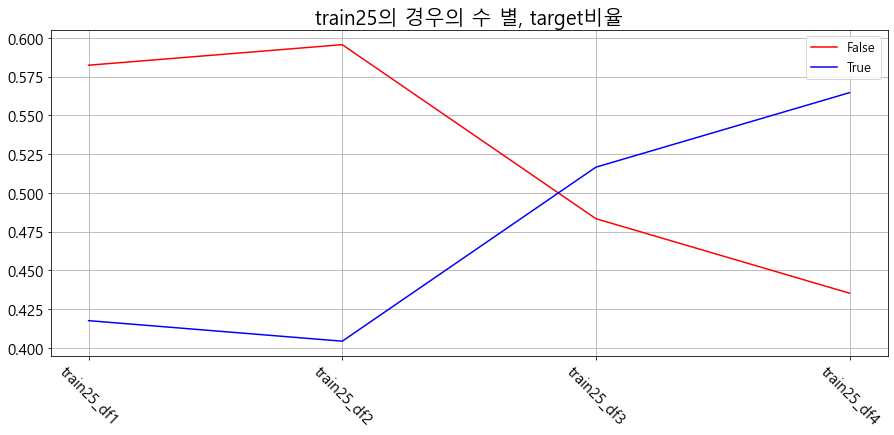

In [73]:
plt.figure(figsize=(15,6))
plt.title('train25의 경우의 수 별, target비율', fontdict={'size':20})
plt.xticks(fontsize=15, rotation=-45)
plt.yticks(fontsize=15)
plt.grid(True)
plt.plot(train_df.iloc[0,:], label='False', color='red')
plt.plot(train_df.iloc[1,:], label='True', color='blue')
plt.legend(fontsize=13)

## test

# 마지막 부분